In [2]:
# Import neccessary libraries and packages for linear regression:

import pandas as pd

from sklearn import linear_model

from sklearn.metrics import mean_absolute_error as mae

from sklearn.metrics import r2_score

In [3]:
# Import lego.csv file:

df = pd.read_csv('lego.csv')

In [4]:
# Check if data is loaded correctly and farmilirize with its contents:

print(df.head(5))

   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  country  
0                  0       20  
1                  2       20  
2                  2       20  
3                  0       20  
4                  1       20  


In [5]:
# Are there any missing values?

missingValues = df.isnull().values.any()
print(f"Is there any missing value? Ans:{missingValues}")

Is there any missing value? Ans:False


In [6]:
# Understand data through looking at minimum and maximum values to see the distribution:

print(f"Range (Min-Max) value of age        : {df['ages'].min()}-{df['ages'].max()}")
print(f"Range (Min-Max) value of list_price : {df['list_price'].min()}-{df['list_price'].max()}")
print(f"Range (Min-Max) value of piece_count: {df['piece_count'].min()}-{df['piece_count'].max()}")

Range (Min-Max) value of age        : 0-30
Range (Min-Max) value of list_price : 2.2724-1104.87
Range (Min-Max) value of piece_count: 1-7541


<AxesSubplot:ylabel='Frequency'>

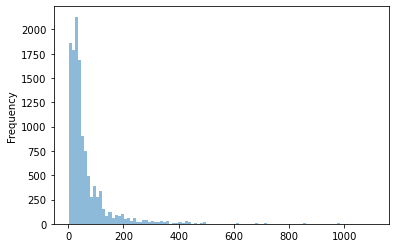

In [7]:
# Create some visualizations to get further insights into prices, ex. how does the price distribution look like?:

df['list_price'].plot.hist(bins=100, alpha=0.5)

In [8]:
# Ensure maximum model performance through random data split: Train (70%) and Test (30%)

train=df.sample(frac=0.7,random_state=200) 
test= df.drop(train.index)
print(f"Total number of instances in data: {df.shape[0]}")
print(f"Training data has instances (70%): {train.shape[0]}")
print(f"Testing data has instances  (30%): {test.shape[0]}")

Total number of instances in data: 12261
Training data has instances (70%): 8583
Testing data has instances  (30%): 3678


In [9]:
# Start with preparing for Simple Linear regression:

simpleLinearRegressionXColumns = ['piece_count'] 
slrTrainX = train[simpleLinearRegressionXColumns]
slrTrainY = train[['list_price']]
slrTestX = test[simpleLinearRegressionXColumns]
slrTestY = test[['list_price']]

slr = linear_model.LinearRegression()
slr.fit(slrTrainX, slrTrainY)

LinearRegression()

In [10]:
# And prepare for Multiple Linear regression:

multipleLinearRegressionXColumns = ['piece_count','ages'] # You may increase columns-->['ages', 'num_reviews','piece_count','play_star_rating','review_difficulty','country']
mlrTrainX = train[multipleLinearRegressionXColumns]
mlrTrainY = train[['list_price']]
mlrTestX = test[multipleLinearRegressionXColumns]
mlrTestY = test[['list_price']]

mlr = linear_model.LinearRegression()
mlr.fit(mlrTrainX, mlrTrainY)

LinearRegression()

In [11]:
# Continue with analysing and comparing metrics from both SLR and MLR:


# First training and test data for SLR:

slrTrainPred = slr.predict(slrTrainX) # Training data
slrTestPred  = slr.predict(slrTestX)  # Test data

r2_score_training = r2_score(slrTrainY,slrTrainPred)
print(f"(Simple Linear Regressor) Training data r square score     : {r2_score_training*100}%")
r2_score_test = r2_score(slrTestY,slrTestPred)
print(f"(Simple Linear Regressor) Testing  data r square score     : {r2_score_test*100}%")\


trainMAE = mae(slrTrainY,slrTrainPred)
print(f"(Simple Linear Regressor) Mean absolute error of Training  : {str(trainMAE)}")
trainMAE = mae(slrTestY,slrTestPred)
print(f"(Simple Linear Regressor) Mean absolute error of Training  : {str(trainMAE)}")


print('------------------------------------------------------------------------------')


# Second training and test data for MLR:

mlrTrainPred = mlr.predict(mlrTrainX) # Training data
mlrTestPred  = mlr.predict(mlrTestX)  # Test data

r2_score_training = r2_score(mlrTrainY,mlrTrainPred)
print(f"(Multiple Linear Regressor) Training data r square score    : {r2_score_training*100}%")
r2_score_test = r2_score(slrTestY,slrTestPred)
print(f"(Multiple Linear Regressor) Testing  data r square score    : {r2_score_test*100}%")\


trainMAE = mae(mlrTrainY,mlrTrainPred)
print(f"(Multiple Linear Regressor) Mean absolute error of Training : {str(trainMAE)}")
trainMAE = mae(slrTestY,slrTestPred)
print(f"(Multiple Linear Regressor) Mean absolute error of Training : {str(trainMAE)}")

(Simple Linear Regressor) Training data r square score     : 76.02194983616269%
(Simple Linear Regressor) Testing  data r square score     : 74.60425921564016%
(Simple Linear Regressor) Mean absolute error of Training  : 20.760450492184706
(Simple Linear Regressor) Mean absolute error of Training  : 19.954030274053107
------------------------------------------------------------------------------
(Multiple Linear Regressor) Training data r square score    : 76.03007585891335%
(Multiple Linear Regressor) Testing  data r square score    : 74.60425921564016%
(Multiple Linear Regressor) Mean absolute error of Training : 20.735440796456224
(Multiple Linear Regressor) Mean absolute error of Training : 19.954030274053107


In [12]:
# Additionally look at slope and intercept point of both SLR and MLR:

slrintercept = slr.intercept_
slrslope = slr.coef_[0]
print(f"SLR model intercept:{slrintercept}")
print(f"SLR model slope:    {slrslope}")

mlrintercept = mlr.intercept_
mlrslope = mlr.coef_[0]
print(f"MLR model intercept:{mlrintercept}")
print(f"MLR model slope:    {mlrslope}")

SLR model intercept:[17.07248072]
SLR model slope:    [0.09713581]
MLR model intercept:[15.32687745]
MLR model slope:    [0.09722664 0.10233599]


In [13]:
# Now fidning the best price for a lego set with 8000 pieces through SLR:

prediction = slr.predict([[8000]])
print(f"Output of model on 8000 product  set: {prediction[0]}")

# Check:

calculated = slrintercept + slrslope*8000
print(f"Calculated price on 8000 product set: {calculated}")

print('------------------------------------------------------------------------------')


# Now fidning the best price for a lego set with 8000 pieces for 30-year old customers through MLR:

prediction = mlr.predict([[8000,30]])
print(f"Output of model on 8000 product and 30 years age set: {prediction[0]}")

# Check:

calculated = mlrintercept + mlrslope[0]*8000+mlrslope[1]*30
print(f"Calculated price on 8000 product and 30 years age set: {calculated}")

Output of model on 8000 product  set: [794.15895321]
Calculated price on 8000 product set: [794.15895321]
------------------------------------------------------------------------------
Output of model on 8000 product and 30 years age set: [796.21004624]
Calculated price on 8000 product and 30 years age set: [796.21004624]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
